# The sparks Foundation #December22

## Data science and Business Analytics intern
 
 
 ## Author- **Animesh das**
 
 ## Task2- Prediction using unsupervised Machine Learning Algorithm
  
  
  ## Objective: To predict the optimum number of clusters and represent it visually.

In [50]:
#import warning

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
# importing the rquired libraries

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Importing the dataset

In [54]:
df=pd.read_csv("iris.csv")
df

,ID,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [55]:
df.describe()

,ID,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
# removing the labels from the dataset as it is a unsupervised machine learning algorithm 

In [58]:
df=df.drop(['ID', 'Species'],axis=1)
df

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Finding the optimum number of clusters

In [59]:
# Here we are using the elbow method to find the clusters. The number of clusters varies within a set of ranges.For each number 
# wcss value is calculated and stored in a list. These values are then plotted against the range of numbers of clusters used
# before.

In [60]:
wcss=[]
clusters_range=range(1,15)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km=km.fit(df)
    wcss.append(km.inertia_)

In [61]:
# plotting the within cluster range against the clusters range 

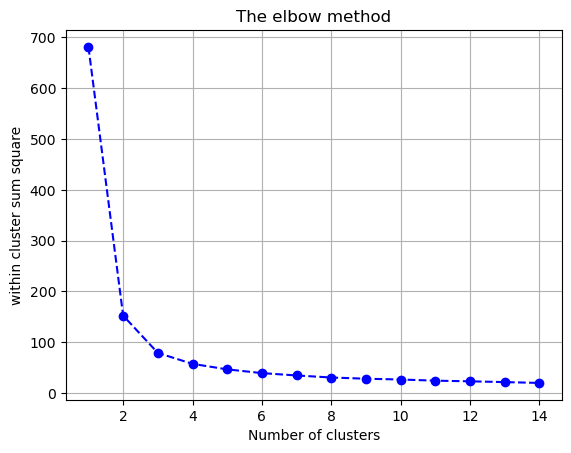

In [62]:
plt.plot(clusters_range,wcss,'go--',color='blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum square')
plt.grid()
plt.show()

## we can clearly see the elbow formation in the above graph, the optimum clusters is where the elbow occurs.

#The optimum cluster in this case is 3 as after 3 there are no major change in the values.

# Applying the kMeans clustering on the data

In [65]:
model=KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10,random_state=0)
predictions=model.fit_predict(df)
predictions



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [66]:
df['Clusters']=predictions

In [67]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
df1=df[df.Clusters==0]
df2=df[df.Clusters==1]
df3=df[df.Clusters==2]

## visualization

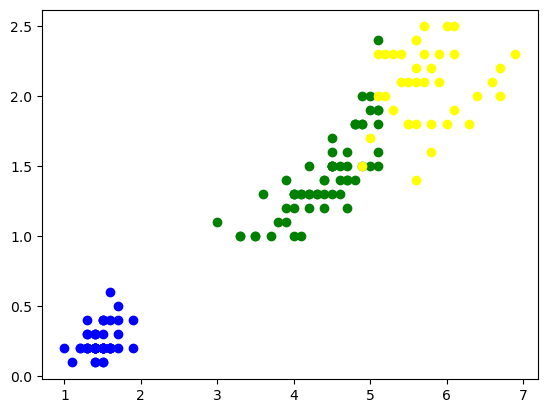

In [70]:
plt.scatter(df1['PetalLength'],df1['PetalWidth'],color='blue')
plt.scatter(df2['PetalLength'],df2['PetalWidth'],color='green')
plt.scatter(df3['PetalLength'],df3['PetalWidth'],color='yellow')

# Labelling the predictions 

In [88]:
#considering 0 Corresponds to 'Iris-setosa'
#1 to 'Iris-versicolour'
#2 to 'Iris-virginica'
predicitons= np.where(predictions==0, 'Iris-setosa',predictions)
predictions= np.where(predictions=='1', 'Iris-versicolour', predictions)
predictions= np.where(predictions=='2', 'Iris-virginica', predictions)

In [89]:
df['species']=predictions

In [94]:
df.head()
df.tail()



,SepalLength,SepalWidth,PetalLength,PetalWidth,Clusters,species
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,1,Iris-versicolour
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica
149,5.9,3.0,5.1,1.8,1,Iris-versicolour


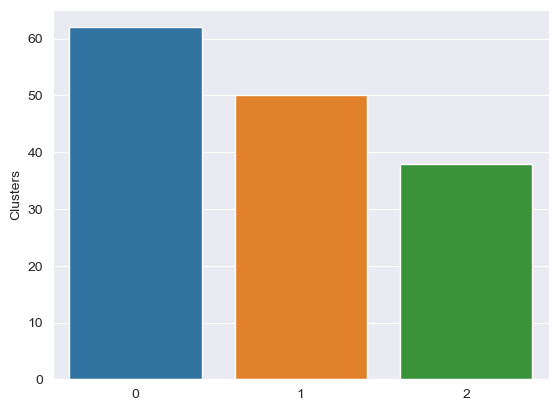

In [98]:
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = df["Clusters"] .unique(),
            y = df["Clusters"] .value_counts());

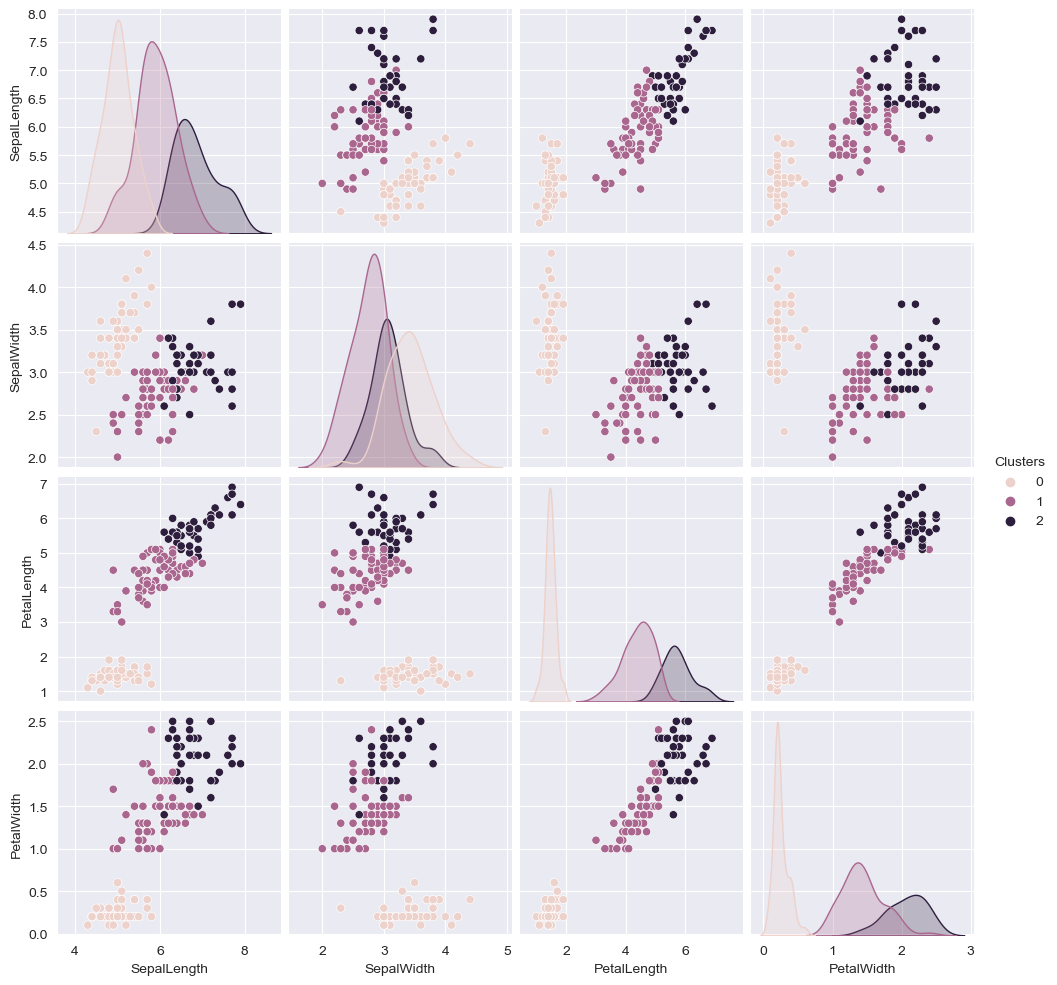

In [101]:

sns.pairplot(df,hue = 'Clusters'); 

# Thank You